In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import Adam, RMSprop
from keras.layers import Input, Dense, Conv1D, MaxPooling1D
from keras.layers import Flatten, Concatenate, Dropout, Reshape, BatchNormalization
from keras.models import Model


C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\tensorf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 144086124944922380
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10116497408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9647863048347301612
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Dataset_EDC_EYDC_MDC_regen"

In [4]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario2_EDC-11K_minmax

dataset = np.load(workdir + "//EDC11K_dataset.npz") # input file
ss0 = np.load(workdir + '//EDC11K_datase_r0_9_1.npz') # split for training and test

In [5]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [6]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [7]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 42


In [8]:
x.shape

(11360, 21313)

In [9]:
training_image_array.shape

(10224, 21313)

In [10]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [12]:
# the number of genes in gene expression data
shape_value = 18988
print(shape_value)

18988


In [13]:
train_X.shape

(10224, 21313)

In [14]:
train_X_cell = train_X[:,:shape_value]
train_X_drug =train_X[:,shape_value:]
test_X_cell = test_X[:,:shape_value]
test_X_drug = test_X[:,shape_value:]

In [15]:
train_X_cell.shape

(10224, 18988)

In [16]:
train_X_cell = train_X_cell.reshape(train_X_cell.shape[0], train_X_cell.shape[1], 1)
train_X_drug = train_X_drug.reshape(train_X_drug.shape[0], train_X_drug.shape[1], 1)
test_X_cell = test_X_cell.reshape(test_X_cell.shape[0], test_X_cell.shape[1], 1)
test_X_drug = test_X_drug.reshape(test_X_drug.shape[0], test_X_drug.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [17]:
print(train_X_cell.shape,train_X_drug.shape, train_y.shape, test_X_cell.shape,test_X_drug.shape, test_y.shape)

(10224, 18988, 1) (10224, 2325, 1) (10224,) (1136, 18988, 1) (1136, 2325, 1) (1136,)


In [18]:
train_X_cell.shape

(10224, 18988, 1)

In [19]:
train_X_cell = train_X_cell.astype('float32')
test_X_cell = test_X_cell.astype('float32')
train_X_drug = train_X_drug.astype('float32')
test_X_drug = test_X_drug.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [20]:
with K.tf.device('/GPU:0'):
    input_cell = Input(shape=(train_X_cell.shape[1], train_X_cell.shape[2]), name='cell_input')
    input_drug = Input(shape=(train_X_drug.shape[1], train_X_drug.shape[2]), name='drug_input')

    conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(input_cell)
    maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
    conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
    maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
    flatten_cell_line = Flatten()(maxpool_cell_line_2)
    dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
    dropout_cell_line = Dropout(0.1)(dense_cell_line)

    conv_drug_1 = Conv1D(filters=50, kernel_size=200, strides=3, activation='tanh')(input_drug)
    maxpool_drug_1 = MaxPooling1D(pool_size=5)(conv_drug_1)
    conv_drug_2 = Conv1D(filters=30, kernel_size=50, strides=5, activation='relu')(maxpool_drug_1)
    maxpool_drug_2 = MaxPooling1D(pool_size=10)(conv_drug_2)
    flatten_drug = Flatten()(maxpool_drug_2)
    dense_drug = Dense(100, activation='relu')(flatten_drug)
    dropout_drug = Dropout(0.1)(dense_drug)

    concatenate = Concatenate()([dropout_cell_line, dropout_drug])
    dense_1 = Dense(300, activation='tanh')(concatenate)
    dropout_1 = Dropout(0.1)(dense_1)
    reshape_1 = Reshape((300,1))(dropout_1)
    conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
    maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
    conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
    conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
    dropout_2 = Dropout(0.1)(maxpool_3)
    flatten = Flatten()(dropout_2)
    dropout_3 = Dropout(0.2)(flatten)
    output = Dense(1, activation='linear', name='pred_lnIC50')(dropout_3)
    model = Model(inputs=[input_cell, input_drug], outputs=output, name='MasterModel')



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cell_input (InputLayer)         (None, 18988, 1)     0                                            
__________________________________________________________________________________________________
drug_input (InputLayer)         (None, 2325, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 3658, 50)     35050       cell_input[0][0]                 
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 709, 50)      10050       drug_input[0][0]                 
__________________________________________________________________________________________________
max_poolin

In [22]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [23]:
optim = Adam(lr=0.0002)

model.compile(loss='mse',
		      optimizer=optim,
			  metrics=['mse','mae'])

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit([train_X_cell, train_X_drug], train_y, validation_data=([test_X_cell, test_X_drug], test_y),
                            batch_size=batch_size,epochs=training_epochs,verbose=1)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-11-23 16:30:32.845446
Instructions for updating:
Use tf.cast instead.
Train on 10224 samples, validate on 1136 samples
Epoch 1/150
10224/10224 [==============================] - 6s 579us/step - loss: 3.1614 - mean_squared_error: 3.1614 - mean_absolute_error: 1.3364 - val_loss: 1.3792 - val_mean_squared_error: 1.3792 - val_mean_absolute_error: 0.6834
Epoch 2/150
10224/10224 [==============================] - 3s 338us/step - loss: 1.5454 - mean_squared_error: 1.5454 - mean_absolute_error: 0.8559 - val_loss: 1.1362 - val_mean_squared_error: 1.1362 - val_mean_absolute_error: 0.6167
Epoch 3/150
10224/10224 [==============================] - 4s 345us/step - loss: 1.3378 - mean_squared_error: 1.3378 - mean_absolute_error: 0.7883 - val_loss: 1.0627 - val_mean_squared_error: 1.0627 - val_mean_absolute_error: 0.6640
Epoch 4/150
10224/10224 [==============================] - 3s 339us/step - loss: 1.2915 - mean_squared_error: 1.2915 - mean_absolute_error: 0.7658 - val_loss: 1.0590

10224/10224 [==============================] - 4s 344us/step - loss: 0.7303 - mean_squared_error: 0.7303 - mean_absolute_error: 0.5913 - val_loss: 0.9249 - val_mean_squared_error: 0.9249 - val_mean_absolute_error: 0.5516
Epoch 35/150
10224/10224 [==============================] - 4s 344us/step - loss: 0.7106 - mean_squared_error: 0.7106 - mean_absolute_error: 0.5811 - val_loss: 0.9080 - val_mean_squared_error: 0.9080 - val_mean_absolute_error: 0.5715
Epoch 36/150
10224/10224 [==============================] - 4s 344us/step - loss: 0.7114 - mean_squared_error: 0.7114 - mean_absolute_error: 0.5777 - val_loss: 0.9397 - val_mean_squared_error: 0.9397 - val_mean_absolute_error: 0.6158
Epoch 37/150
10224/10224 [==============================] - 4s 344us/step - loss: 0.7084 - mean_squared_error: 0.7084 - mean_absolute_error: 0.5804 - val_loss: 0.9608 - val_mean_squared_error: 0.9608 - val_mean_absolute_error: 0.6108
Epoch 38/150
10224/10224 [==============================] - 4s 344us/step - l

10224/10224 [==============================] - 4s 347us/step - loss: 0.5865 - mean_squared_error: 0.5865 - mean_absolute_error: 0.5267 - val_loss: 0.9452 - val_mean_squared_error: 0.9452 - val_mean_absolute_error: 0.5868
Epoch 70/150
10224/10224 [==============================] - 4s 347us/step - loss: 0.5908 - mean_squared_error: 0.5908 - mean_absolute_error: 0.5270 - val_loss: 0.9427 - val_mean_squared_error: 0.9427 - val_mean_absolute_error: 0.5931
Epoch 71/150
10224/10224 [==============================] - 4s 345us/step - loss: 0.5870 - mean_squared_error: 0.5870 - mean_absolute_error: 0.5248 - val_loss: 0.8326 - val_mean_squared_error: 0.8326 - val_mean_absolute_error: 0.5436
Epoch 72/150
10224/10224 [==============================] - 4s 348us/step - loss: 0.5738 - mean_squared_error: 0.5738 - mean_absolute_error: 0.5186 - val_loss: 0.8395 - val_mean_squared_error: 0.8395 - val_mean_absolute_error: 0.5241
Epoch 73/150
10224/10224 [==============================] - 4s 345us/step - l

10224/10224 [==============================] - 4s 347us/step - loss: 0.5268 - mean_squared_error: 0.5268 - mean_absolute_error: 0.4969 - val_loss: 0.8648 - val_mean_squared_error: 0.8648 - val_mean_absolute_error: 0.5636
Epoch 105/150
10224/10224 [==============================] - 4s 345us/step - loss: 0.5291 - mean_squared_error: 0.5291 - mean_absolute_error: 0.4975 - val_loss: 0.8723 - val_mean_squared_error: 0.8723 - val_mean_absolute_error: 0.5575
Epoch 106/150
10224/10224 [==============================] - 4s 347us/step - loss: 0.5268 - mean_squared_error: 0.5268 - mean_absolute_error: 0.4950 - val_loss: 0.8371 - val_mean_squared_error: 0.8371 - val_mean_absolute_error: 0.5322
Epoch 107/150
10224/10224 [==============================] - 4s 347us/step - loss: 0.5121 - mean_squared_error: 0.5121 - mean_absolute_error: 0.4893 - val_loss: 0.8325 - val_mean_squared_error: 0.8325 - val_mean_absolute_error: 0.5301
Epoch 108/150
10224/10224 [==============================] - 4s 347us/step

Epoch 139/150
10224/10224 [==============================] - 4s 345us/step - loss: 0.4770 - mean_squared_error: 0.4770 - mean_absolute_error: 0.4696 - val_loss: 0.8248 - val_mean_squared_error: 0.8248 - val_mean_absolute_error: 0.5287
Epoch 140/150
10224/10224 [==============================] - 4s 348us/step - loss: 0.4611 - mean_squared_error: 0.4611 - mean_absolute_error: 0.4635 - val_loss: 0.8123 - val_mean_squared_error: 0.8123 - val_mean_absolute_error: 0.4882
Epoch 141/150
10224/10224 [==============================] - 4s 347us/step - loss: 0.4667 - mean_squared_error: 0.4667 - mean_absolute_error: 0.4686 - val_loss: 0.8102 - val_mean_squared_error: 0.8102 - val_mean_absolute_error: 0.5252
Epoch 142/150
10224/10224 [==============================] - 4s 342us/step - loss: 0.4666 - mean_squared_error: 0.4666 - mean_absolute_error: 0.4663 - val_loss: 0.9000 - val_mean_squared_error: 0.9000 - val_mean_absolute_error: 0.5306
Epoch 143/150
10224/10224 [==============================] -

In [24]:
import json
from keras.models import model_from_json, load_model
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Result//EDC11K//CNN"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//EDC11K_CNN_model_fix_v3.h5')
with open(workdir + '//EDC11K_CNN_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [25]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//EDC11K_CNN_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [26]:
test_eval = model.evaluate([test_X_cell,test_X_drug], test_label_array, verbose=1)

1136/1136 [==============================] - 0s 257us/step


In [27]:
test_eval

[0.8709160106282838, 0.8709160106282838, 0.52360832019591]

In [28]:
accuracy = model_train.history['mean_squared_error']
val_accuracy = model_train.history['val_mean_squared_error']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [29]:
import matplotlib
from matplotlib import pyplot as plt

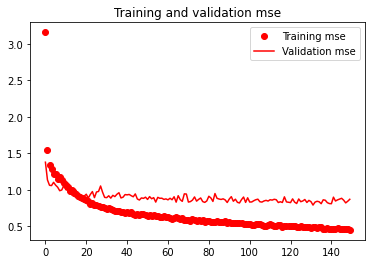

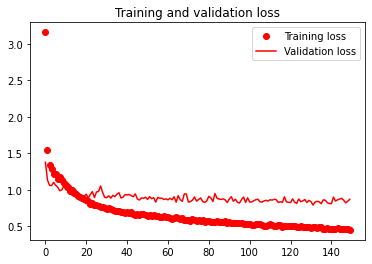

In [30]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse',c='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse',c='red')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes = model.predict([test_X_cell,test_X_drug])

In [32]:
predicted_value = predicted_classes

In [33]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [34]:
c.to_csv(workdir + '//EDC11K_CNN_pred_obs_table.csv')

In [35]:
c

,Predicted,Test
0,-0.093960,0.194956
1,-2.601379,-0.678423
2,1.936490,2.079442
3,1.770970,2.079442
4,1.611902,1.269606
...,...,...
1131,2.041679,2.079442
1132,2.092882,2.079442
1133,1.890145,2.079442
1134,1.390846,0.178212


In [36]:
predicted_value.shape

(1136, 1)

In [37]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8113346073312864, intercept=0.16693400422132687, rvalue=0.8783885038532488, pvalue=0.0, stderr=0.013109522014565115)

In [38]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7695144664908358


In [39]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.9332288417491342


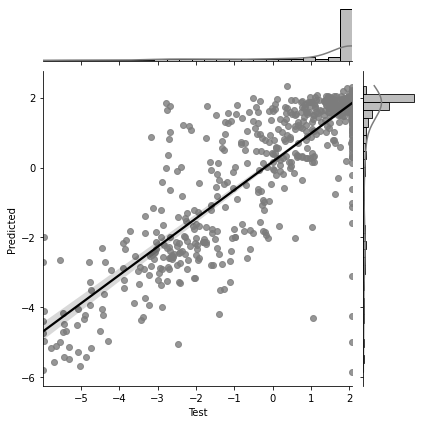

In [40]:
workdir = "E://Ronny_TF//201120_EDC_EYDC_MDC_other_PC//Result//Fig_backbone//EDC11K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//EDC11K_CNN.png', dpi=300)